## Step1 因子算法

In [1]:
#coding=utf-8
import pandas as pd
import talib as ta
import numpy as np

# 1. 编制函数需要的算法，调用talib计算momentum
def momentum(df, period=5):
    return pd.DataFrame(
        {name: ta.ROCR(item.values, period)
         for name, item in df.iteritems()},
         index=df.index
        )

def winsorize(df):
    q = df.quantile([0.025, 0.975])
    if isinstance(q, pd.Series) and len(q) == 2:
        df[df < q.iloc[0]] = q.iloc[0]
        df[df > q.iloc[1]] = q.iloc[1]
    return df

def standardize(df):
    df_std = df.std()
    df_mean = df.mean()
    return (df - df_mean) / df_std

# 2. 定义计算alpha值的类
class alphas(object):
    def __init__(self, pn_data):
        self.close = pn_data.minor_xs('close')
        self.PE = pn_data.minor_xs('PE')
        self.PB = pn_data.minor_xs('PB')
        self.PS = pn_data.minor_xs('PS')
        self.PCF = pn_data.minor_xs('PCF')

# 3. 编制因子的函数，并返回因子DataFrame
    def mom_alpha(self):
        alpha = -1 * momentum(self.close)
        return alpha

    def PE_alpha(self):
        alpha = -standardize(winsorize(self.PE))
        return alpha

    def PB_alpha(self):
        alpha = -standardize(winsorize(self.PB))
        return alpha

    def PS_alpha(self):
        alpha = -standardize(winsorize(self.PS))
        return alpha

    def PCF_alpha(self):
        alpha = -standardize(winsorize(self.PCF))
        return alpha

## Step2 获取股票池（沪深300 & 创业板）

In [2]:
# 4. 传入股票数据(这里可以换板块与分类)
if __name__ == '__main__':
    from fxdayu_data import DataAPI
    from datetime import datetime
    import tushare as ts
    import numpy as np
    # from sklearn import preprocessing
    import matplotlib.pyplot as plt
    import pandas as pd
    import alphalens

    DataAPI.set_file('D:/PycharmProjects/Quant_Alpha/Data_Manager/Factor_Selection/config.py')

    def coder(code):
        if code.startswith('6'):
            return code + '.XSHG'
        elif code.startswith('0') or code.startswith('3'):
            return code + '.XSHE'
        else:
            return code

    name = ts.get_hs300s()
    name_list = list(name.code)
    hs300_codes = tuple(map(coder, name_list))
    print(hs300_codes)

('002230.XSHE', '002299.XSHE', '601225.XSHG', '002174.XSHE', '601727.XSHG', '600019.XSHG', '601127.XSHG', '002385.XSHE', '601216.XSHG', '300070.XSHE', '000709.XSHE', '002074.XSHE', '600074.XSHG', '000983.XSHE', '300133.XSHE', '300072.XSHE', '601118.XSHG', '300059.XSHE', '000826.XSHE', '300144.XSHE', '600867.XSHG', '300024.XSHE', '002131.XSHE', '002152.XSHE', '600188.XSHG', '600010.XSHG', '600009.XSHG', '000792.XSHE', '300002.XSHE', '600048.XSHG', '002739.XSHE', '300017.XSHE', '300033.XSHE', '000778.XSHE', '600271.XSHG', '300058.XSHE', '601258.XSHG', '601600.XSHG', '300251.XSHE', '000060.XSHE', '600383.XSHG', '600875.XSHG', '002146.XSHE', '600111.XSHG', '600256.XSHG', '601933.XSHG', '600873.XSHG', '600446.XSHG', '300027.XSHE', '000027.XSHE', '000425.XSHE', '600583.XSHG', '300168.XSHE', '002153.XSHE', '601021.XSHG', '000977.XSHE', '000555.XSHE', '000402.XSHE', '002183.XSHE', '600352.XSHG', '600157.XSHG', '000876.XSHE', '600582.XSHG', '601611.XSHG', '000800.XSHE', '000630.XSHE', '600718.X

In [3]:
    name = ts.get_gem_classified()
    name_list = list(name.code)
    gem_codes = tuple(map(coder, name_list))
    print(gem_codes)

('300001.XSHE', '300002.XSHE', '300003.XSHE', '300004.XSHE', '300005.XSHE', '300006.XSHE', '300007.XSHE', '300008.XSHE', '300009.XSHE', '300010.XSHE', '300011.XSHE', '300012.XSHE', '300013.XSHE', '300014.XSHE', '300015.XSHE', '300016.XSHE', '300017.XSHE', '300018.XSHE', '300019.XSHE', '300020.XSHE', '300021.XSHE', '300022.XSHE', '300023.XSHE', '300024.XSHE', '300025.XSHE', '300026.XSHE', '300027.XSHE', '300028.XSHE', '300029.XSHE', '300030.XSHE', '300031.XSHE', '300032.XSHE', '300033.XSHE', '300034.XSHE', '300035.XSHE', '300036.XSHE', '300037.XSHE', '300038.XSHE', '300039.XSHE', '300040.XSHE', '300041.XSHE', '300042.XSHE', '300043.XSHE', '300044.XSHE', '300045.XSHE', '300046.XSHE', '300047.XSHE', '300048.XSHE', '300049.XSHE', '300050.XSHE', '300051.XSHE', '300052.XSHE', '300053.XSHE', '300054.XSHE', '300055.XSHE', '300056.XSHE', '300057.XSHE', '300058.XSHE', '300059.XSHE', '300061.XSHE', '300062.XSHE', '300063.XSHE', '300064.XSHE', '300065.XSHE', '300066.XSHE', '300067.XSHE', '300068.X

## Step3 获取数据并计算IC

In [4]:
    hs300_PN = DataAPI.factor(hs300_codes, ('PE', 'PB', 'PS', 'PCF', 'close'), start=datetime(2013, 1, 1))
    hs300_prices = hs300_PN.minor_xs('close')

    #5. 输出Factor数据
    alpha = alphas(hs300_PN)

    hs300_factors = {'mom': alpha.mom_alpha(),
               'pe': alpha.PE_alpha(),
               'pb': alpha.PB_alpha(),
               'ps': alpha.PS_alpha(),
               'pcf': alpha.PCF_alpha()}

    def cal_monthly_ic(factor):
        hs300_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor.stack(), hs300_prices, quantiles=5)
        return alphalens.performance.mean_information_coefficient(hs300_factor_data, by_time='M')

    hs300_monthly_ic = {key: cal_monthly_ic(value) for key, value in hs300_factors.items()}

    hs300_monthly_ic_mean = pd.DataFrame(
        map(lambda frame: frame.mean(), hs300_monthly_ic.values()),
        hs300_monthly_ic.keys()
    )
    hs300_monthly_ic_std = pd.DataFrame(
        map(lambda frame: frame.std(), hs300_monthly_ic.values()),
        hs300_monthly_ic.keys()
    )
    print hs300_monthly_ic_std

D:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


           1         5         10
pb   0.041276  0.086682  0.114879
ps   0.045880  0.093095  0.122797
pcf  0.015907  0.034832  0.048164
mom  0.047748  0.066810  0.062918
pe   0.031480  0.067954  0.088178


## Step4 用柱图显示IC的均值与标准差

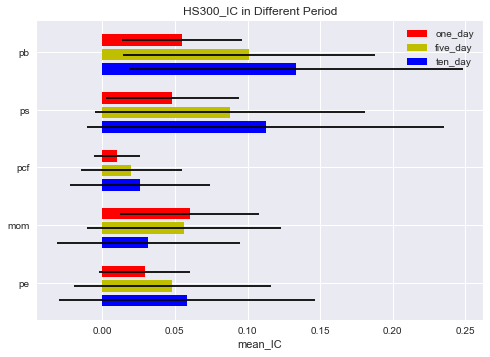

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

N=5
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

# Example data
ind_name = tuple(hs300_monthly_ic_mean.index)
y_pos = np.arange(len(ind))

one_mean = hs300_monthly_ic_mean.iloc[:,0]
one_std = hs300_monthly_ic_std.iloc[:,0]
five_mean = hs300_monthly_ic_mean.iloc[:,1]
five_std = hs300_monthly_ic_std.iloc[:,1]
ten_mean = hs300_monthly_ic_mean.iloc[:,2]
ten_std = hs300_monthly_ic_std.iloc[:,2]


ax.barh(ind - width, one_mean, align='edge',height=0.2, xerr=one_std, label='one_day', color='r')
ax.barh(ind - 0.05, five_mean, align='edge',height=0.2,xerr=five_std, label='five_day', color='y')
ax.barh(ind + width, ten_mean, align='center',height=0.2,xerr=ten_std, label='ten_day', color='b')

ax.set_yticks(y_pos)
ax.set_yticklabels(ind_name)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean_IC')
ax.set_title('HS300_IC in Different Period')
plt.legend()
plt.show()

In [6]:
    gem_PN = DataAPI.factor(gem_codes, ('PE', 'PB', 'PS', 'PCF', 'close'), start=datetime(2013, 1, 1))
    gem_prices = gem_PN.minor_xs('close')

    alpha = alphas(gem_PN)

    gem_factors = {'mom': alpha.mom_alpha(),
               'pe': alpha.PE_alpha(),
               'pb': alpha.PB_alpha(),
               'ps': alpha.PS_alpha(),
               'pcf': alpha.PCF_alpha()}

    def cal_monthly_ic(factor):
        gem_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor.stack(), gem_prices, quantiles=5)
        return alphalens.performance.mean_information_coefficient(gem_factor_data, by_time='M')

    gem_monthly_ic = {key: cal_monthly_ic(value) for key, value in gem_factors.items()}

    gem_monthly_ic_mean = pd.DataFrame(
        map(lambda frame: frame.mean(), gem_monthly_ic.values()),
        gem_monthly_ic.keys()
    )
    gem_monthly_ic_std = pd.DataFrame(
        map(lambda frame: frame.std(), gem_monthly_ic.values()),
        gem_monthly_ic.keys()
    )
    print gem_monthly_ic_std

           1         5         10
pb   0.040299  0.076477  0.098643
ps   0.044058  0.077361  0.099210
pcf  0.017079  0.025455  0.034870
mom  0.049740  0.054195  0.050457
pe   0.034940  0.056924  0.072033


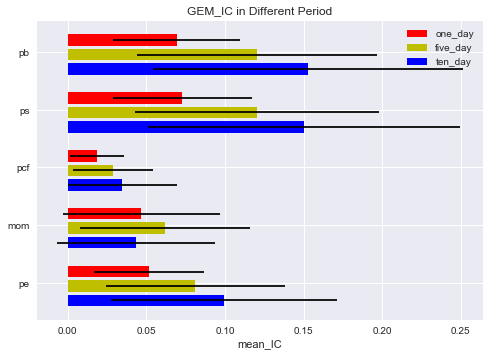

In [7]:
fig, ax = plt.subplots()

N=5
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

# Example data
ind_name = tuple(gem_monthly_ic_mean.index)
y_pos = np.arange(len(ind))

one_mean = gem_monthly_ic_mean.iloc[:,0]
one_std = gem_monthly_ic_std.iloc[:,0]
five_mean = gem_monthly_ic_mean.iloc[:,1]
five_std = gem_monthly_ic_std.iloc[:,1]
ten_mean = gem_monthly_ic_mean.iloc[:,2]
ten_std = gem_monthly_ic_std.iloc[:,2]


ax.barh(ind - width, one_mean, align='edge',height=0.2, xerr=one_std, label='one_day', color='r')
ax.barh(ind - 0.05, five_mean, align='edge',height=0.2,xerr=five_std, label='five_day', color='y')
ax.barh(ind + width, ten_mean, align='center',height=0.2,xerr=ten_std, label='ten_day', color='b')

ax.set_yticks(y_pos)
ax.set_yticklabels(ind_name)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean_IC')
ax.set_title('GEM_IC in Different Period')
plt.legend()
plt.show()

## Step5 计算Rolling IC与设置IC=0.02的阈值

In [8]:
    monthly_ic = pd.Panel.from_dict(hs300_monthly_ic)

    from fxdayu_data.tools.pandas_tools import pipeline

    print pipeline(**{str(i): monthly_ic.minor_xs(i) for i in (1, 5, 10)})

                       1        10         5
date                                        
2013-01-31 mom  0.004785  0.027839 -0.031491
           pb   0.050856  0.125385  0.070000
           pcf  0.012564  0.016414  0.016471
           pe   0.009948 -0.010699 -0.021452
           ps   0.031164  0.074506  0.035722
2013-02-28 mom  0.020779  0.012162  0.039352
           pb   0.111909  0.286928  0.256051
           pcf  0.013928  0.045877  0.049146
           pe   0.048823  0.121251  0.114016
           ps   0.077357  0.245443  0.201934
2013-03-31 mom  0.053844  0.044456  0.120412
           pb   0.029067  0.033093  0.013236
           pcf -0.008413 -0.068354 -0.046388
           pe   0.016459 -0.014570 -0.014474
           ps   0.029380  0.014502  0.016196
2013-04-30 mom  0.021387 -0.098225 -0.049889
           pb   0.040918  0.182080  0.087633
           pcf -0.015766 -0.036764 -0.046877
           pe  -0.012950  0.012024 -0.017029
           ps  -0.003285  0.050413 -0.012848
2013-05-31

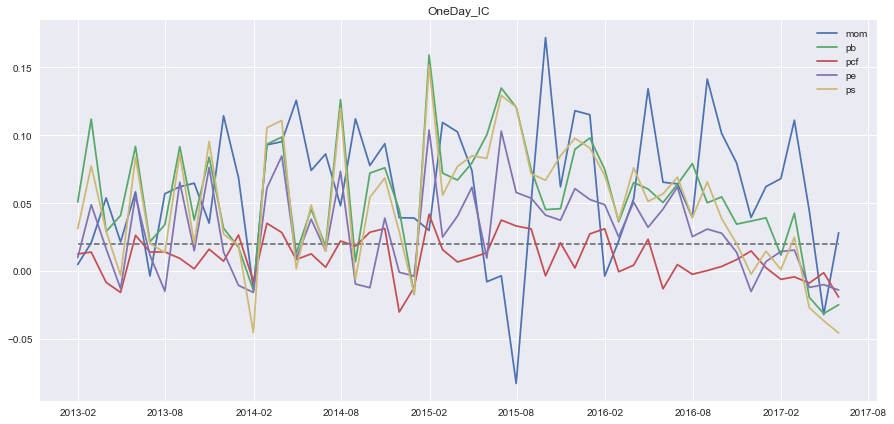

In [9]:
fig = plt.figure(figsize=(15,7))
plt.plot(monthly_ic.minor_xs(1))
plt.hlines(0.02,monthly_ic.minor_xs(1).index[0],monthly_ic.minor_xs(1).index[-1] , linestyles='dashed', alpha=0.5)
plt.legend(monthly_ic.minor_xs(1).columns)
plt.title('OneDay_IC')
plt.show()

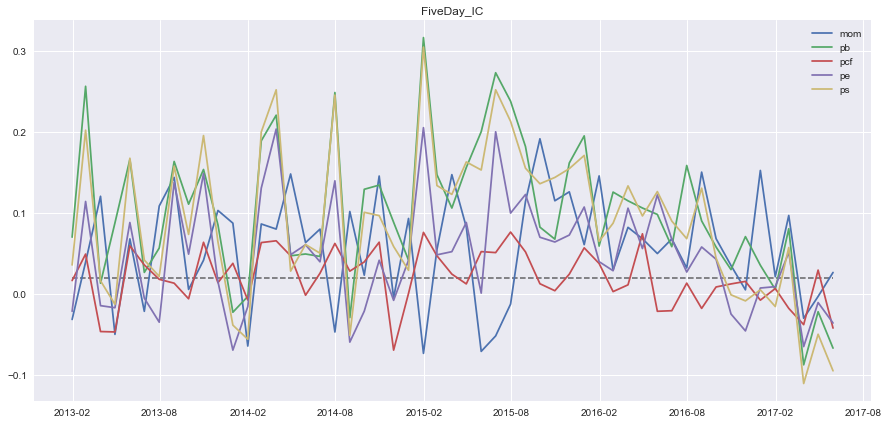

In [10]:
fig = plt.figure(figsize=(15,7))
plt.plot(monthly_ic.minor_xs(5))
plt.hlines(0.02,monthly_ic.minor_xs(5).index[0],monthly_ic.minor_xs(5).index[-1] , linestyles='dashed', alpha=0.5)
plt.legend(monthly_ic.minor_xs(5).columns)
plt.title('FiveDay_IC')
plt.show()

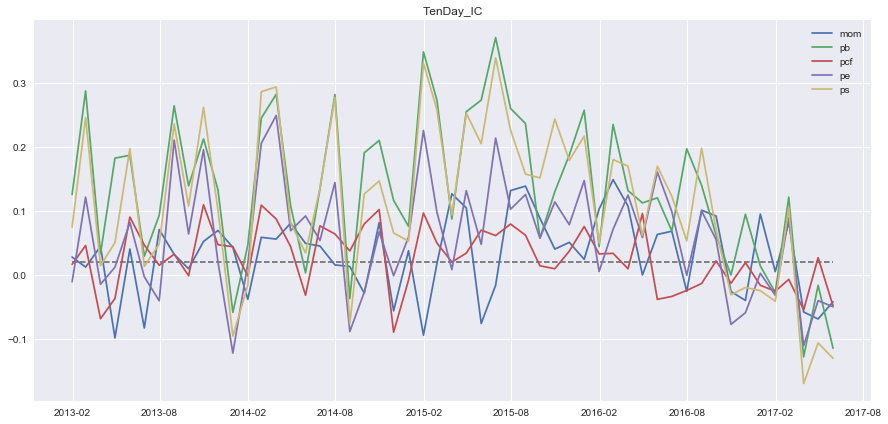

In [11]:
fig = plt.figure(figsize=(15,7))
plt.plot(monthly_ic.minor_xs(10))
plt.hlines(0.02,monthly_ic.minor_xs(10).index[0],monthly_ic.minor_xs(10).index[-1] , linestyles='dashed', alpha=0.5)
plt.legend(monthly_ic.minor_xs(10).columns)
plt.title('TenDay_IC')
plt.show()

## Step6 检验IC是否满足正态分布

In [12]:
from statsmodels.stats.stattools import jarque_bera

print monthly_ic.minor_xs(1)
_, pvalue1, _, _ = jarque_bera(monthly_ic.minor_xs(1).dropna().values)
print 'pvalue One_Day is normally distributed', pvalue1

                 mom        pb       pcf        pe        ps
date                                                        
2013-01-31  0.004785  0.050856  0.012564  0.009948  0.031164
2013-02-28  0.020779  0.111909  0.013928  0.048823  0.077357
2013-03-31  0.053844  0.029067 -0.008413  0.016459  0.029380
2013-04-30  0.021387  0.040918 -0.015766 -0.012950 -0.003285
2013-05-31  0.058286  0.091755  0.026286  0.055342  0.083892
2013-06-30 -0.003691  0.021544  0.014001  0.011619  0.020291
2013-07-31  0.056948  0.034138  0.014027 -0.014912  0.013659
2013-08-31  0.062054  0.091625  0.009307  0.065409  0.086097
2013-09-30  0.064684  0.037624  0.001609  0.014925  0.020132
2013-10-31  0.035302  0.083892  0.016070  0.076236  0.095498
2013-11-30  0.114354  0.031491  0.007191  0.013942  0.027112
2013-12-31  0.068864  0.017526  0.026543 -0.010593  0.018999
2014-01-31 -0.013510 -0.014301 -0.007813 -0.015837 -0.045511
2014-02-28  0.092932  0.093422  0.035138  0.061151  0.105582
2014-03-31  0.095301  0.

## Step 7 计算IR

In [13]:
# IR = mean/std

def IR(df):
    return df.mean()/df.std()
print 'OneDay_IR:', IR(monthly_ic.minor_xs(1))
print 'FiveDay_IR:', IR(monthly_ic.minor_xs(5))
print 'TenDay_IR:', IR(monthly_ic.minor_xs(10))

OneDay_IR: mom    1.259046
pb     1.333593
pcf    0.625310
pe     0.926724
ps     1.049582
dtype: float64
FiveDay_IR: mom    0.846624
pb     1.167643
pcf    0.574126
pe     0.709069
ps     0.944523
dtype: float64
TenDay_IR: mom    0.502525
pb     1.160337
pcf    0.542430
pe     0.663134
ps     0.916273
dtype: float64
